In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

Historical Data Analyses
-----------------------------------
-Data Source: https://www.adelaide.edu.au/wine-econ/databases/global-wine-history/
-Data File: https://www.adelaide.edu.au/wine-econ/databases/Megafile_of_global_wine_data_1835_to_2016_1217.xlsx

#### The source file has over 100 sheets. For this study we used:
*T6 Volume of wine production
*T8 Volume of wine production per capita
*T10 Volume of wine exports
*T12 Volume of wine exports per capita
*T15 Volume of wine imports
*T17 Volume of wine imports per capita
*T58 Population

In [2]:
# Read each sheet into a dataframe
# Cleanup included naming the year column and skipping the first row (sheet title)
# The dataframes follow the source data codes (T6, T10, etc.) described above.

file = '../data/rawdata/Megafile_of_global_wine_data_1835_to_2016_1217.xlsx'
T6_df = pd.read_excel(file, sheet_name='T6 Wine production', skiprows=1) # 1st row is sheet title, 2nd is column header
T6_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) # 1st col is year, but has no header, thus renaming here
print("Column headings:")
print(T6_df.columns)

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation'],
      dtype='object')


In [3]:
T6_df.tail()

,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Malaysia,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation
177,2012,4209724.0,4107370.0,611461.553,3112256.0,215475.0,11368.0,NaN,NaN,901200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.611222e+07,NaN,1.668259
178,2013,4293466.0,4796590.0,603970.111,4607854.5,239195.0,12989.0,NaN,NaN,840900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.864665e+07,NaN,1.783786
179,2014,4650000.0,4208750.0,603327.000,3950000.0,199869.0,15394.0,NaN,NaN,920200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.738977e+07,NaN,1.714469
180,2015,4700000.0,4950000.0,700000.000,3770000.0,230000.0,16000.0,NaN,NaN,887281.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.760000e+07,NaN,1.496935
181,2016,4350000.0,5090000.0,600000.000,3930000.0,200000.0,16000.0,NaN,NaN,900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.670000e+07,NaN,1.549924


In [67]:
# World population from big spreadsheet
T58_df = pd.read_excel(file, sheet_name='T58 Population', skiprows=1) # 1st row is sheet title, 2nd is column header
T58_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) # 1st col is year, but has no header, thus renaming here
#print("Column headings:")
#print(T6_df.columns)


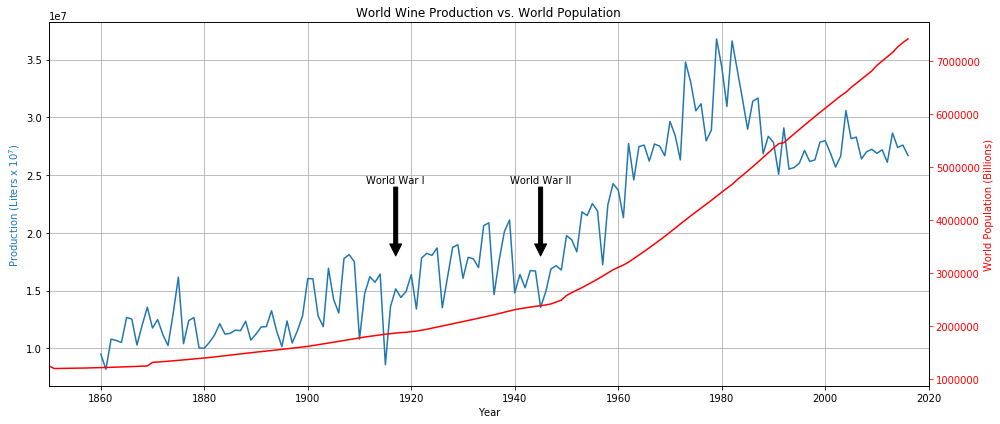

In [68]:
# Graphing World Prod for all years
# 
# read: https://www.thedrinksbusiness.com/2018/04/global-wine-production-drops-to-historic-low/

fig, ax1 = plt.subplots(figsize=(14,6))
years = T6_df.Year # T6 is the sheet with production values
prod = T6_df.World # World column has the total 
ax1.plot(years,prod, color='#1f77b4')
ax1.grid()
ax1.annotate('World War I', xy=(1917, 18000000), xycoords='data', xytext=(1917, 25000000), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=1),
            horizontalalignment='center', verticalalignment='top',)
ax1.annotate('World War II', xy=(1945, 18000000), xycoords='data', xytext=(1945, 25000000), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=1),
            horizontalalignment='center', verticalalignment='top',)

ax1.set_xlabel('Year')
ax1.set_ylabel('Production (Liters x $10^7$)', color='#1f77b4')


# World population
# http://www.worldometers.info/world-population/world-population-by-year/
#popfile = "../data/rawdata/World_population.csv"
#world_pop_df = pd.read_csv(popfile)
pyears=T58_df.Year
population = T58_df.World

ax2 = ax1.twinx()
ax2.plot(pyears,population, color='r')
ax2.set_ylabel('World Population (Billions)', color='r')
ax2.tick_params('y', colors='r')

plt.title("World Wine Production vs. World Population")
plt.xlim(left = 1850, right=2020)

fig.tight_layout()
plt.show()

In [5]:
world_pop_df.head()

,Year,Population,Change,Net,Density,Urban,Pct_Urb
0,2016,7466964280,0.0114,83955460.0,50.0,4.034193e+09,0.54
1,2015,7383008820,0.0116,84555787.0,50.0,3.957285e+09,0.54
2,2014,7298453033,0.0118,85026581.0,49.0,3.880128e+09,0.53
3,2013,7213426452,0.0120,85249517.0,48.0,3.802824e+09,0.53
4,2012,7128176935,0.0121,85168349.0,48.0,3.725502e+09,0.52


In [39]:
# Top producers in 2016

T6_2016_se = T6_df.iloc[181,1:52] # First column is year. Columns 53 onwards are "other", "world" and "Coef" 
T6_2016_df = pd.DataFrame({'Country':T6_2016_se.index,'Production':T6_2016_se.values})
T6_2016_df = T6_2016_df.dropna(how='any') # dropping countries without data or production
T6_2016_df = T6_2016_df.set_index('Country')
T6_2016_df = T6_2016_df.sort_values("Production", ascending=False)
T6_2016_df.head()

,Production
Country,
Italy,5090000.0
France,4350000.0
Spain,3930000.0
United States,3150000.0
Australia,1310000.0


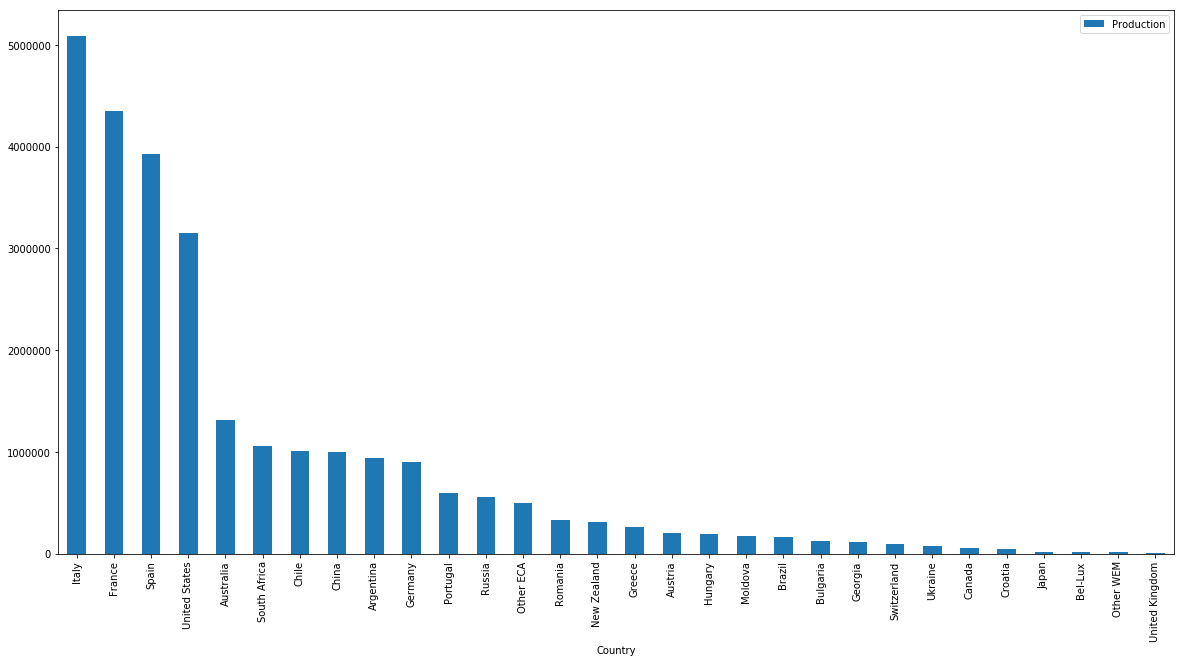

In [40]:
# plot
T6_2016_df.plot(kind="bar", figsize=(20,10))

In [6]:
T8_df = pd.read_excel(file, sheet_name='T8 Wine prodn per capita', skiprows=1)
T8_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
print("Column headings:")
print(T8_df.columns)
T8_df.tail()

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation'],
      dtype='object')


,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Malaysia,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation
180,2015.0,74.212894,80.204806,67.634138,81.740267,26.917629,1.348369,NaN,NaN,10.797329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.755372,NaN,0.899827
181,2016.0,65.217391,82.495948,57.692308,85.434783,23.255814,1.333333,NaN,NaN,10.895884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.599353,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


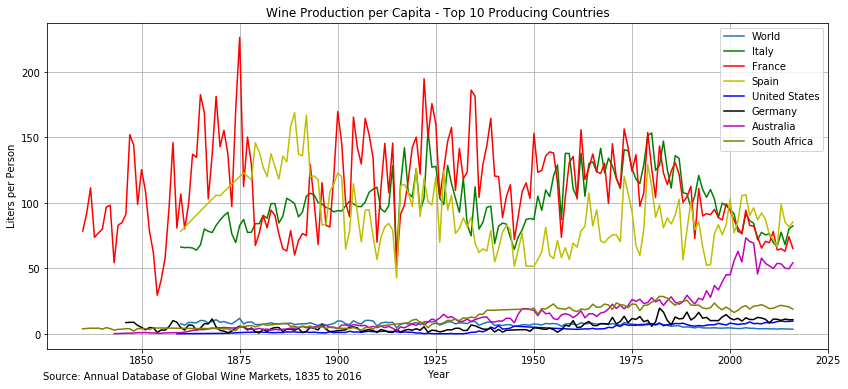

In [51]:
years = T8_df.Year
prodpcww = T8_df.World
prodpcUS = T8_df['United States']
prodpcIT = T8_df.Italy
prodpcDE = T8_df.Germany
prodpcFR = T8_df.France
prodpcES = T8_df.Spain
prodpcAU = T8_df.Australia
prodpcZA = T8_df['South Africa']

plt.figure(figsize=(14,6))
plt.grid()
plt.plot(years,prodpcww)
plt.plot(years,prodpcIT, color='g')
plt.plot(years,prodpcFR, color='b')
plt.plot(years,prodpcES, color='y')
plt.plot(years,prodpcUS, color='r')
plt.plot(years,prodpcAU, color='m')
plt.plot(years,prodpcZA, color='k')
plt.plot(years,prodpcDE, color='olive')

plt.title("Wine Production per Capita - Top 10 Producing Countries")
plt.xlabel("Year")
plt.ylabel("Liters per Person")
plt.text(1825,-35,"Source: Annual Database of Global Wine Markets, 1835 to 2016")

plt.legend()

In [9]:
T34_df = pd.read_excel(file, sheet_name='T34 Wine consumption vol', skiprows=1)
T34_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
print("Column headings:")
print(T34_df.columns)
T34_df.tail()

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation', 'Norway'],
      dtype='object')


,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation,Norway
177,2012,2.988720e+06,2.130703e+06,589749.515644,713694.917010,258439.370594,304616.682750,157819.879266,64138.531013,1.855139e+06,...,10769.0,12638.000000,15428.0,8051.0,48000.000000,NaN,2.505842e+07,NaN,1.518094,95771.101417
178,2013,2.914485e+06,2.087168e+06,448380.909698,685135.626342,247353.673640,347282.292833,167486.932390,64851.239412,1.798338e+06,...,9832.0,13185.000000,13618.0,7210.0,49000.000000,NaN,2.457820e+07,NaN,1.544614,97359.440833
179,2014,2.786903e+06,1.950000e+06,445350.809498,700000.000000,246715.666667,370580.085583,169762.411249,63810.630416,1.812997e+06,...,14454.0,14994.584549,13893.0,6021.0,43766.317596,NaN,2.457742e+07,NaN,1.524039,96323.100000
180,2015,2.720000e+06,2.140000e+06,NaN,NaN,248142.333333,NaN,NaN,NaN,1.850000e+06,...,17079.0,12871.000000,15001.0,3929.0,56000.000000,591356.831,2.498000e+07,NaN,1.409033,NaN
181,2016,2.700000e+06,2.250000e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.020000e+06,...,19781.0,NaN,16123.0,NaN,NaN,NaN,2.410000e+07,NaN,NaN,NaN


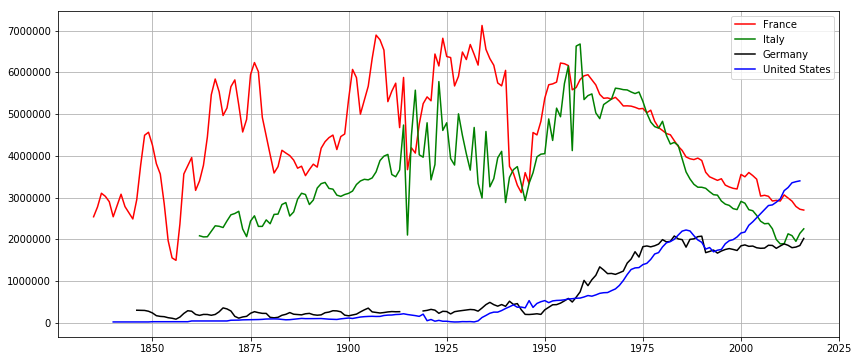

In [65]:
years = T34_df.Year
consww = T34_df.World
consUS = T34_df['United States']
consIT = T34_df.Italy
consDE = T34_df.Germany
consFR = T34_df.France

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years,consww)
plt.plot(years,consFR, color='r')
plt.plot(years,consIT, color='g')
plt.plot(years,consDE, color='k')
plt.plot(years,consUS, color='b')
plt.legend()

In [14]:
T38_df = pd.read_excel(file, sheet_name='T38 Wine consumption per capita', skiprows=1)
T38_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
print("Column headings:")
print(T38_df.columns)
T38_df.tail()

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation', 'Norway'],
      dtype='object')


,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation,Norway
177,2012,45.506503,34.668694,56.087329,15.262524,30.657135,26.126740,28.224599,11.846855,23.038336,...,0.111357,2.378962,0.663055,0.120551,0.057113,NaN,3.539570,NaN,0.932590,19.083333
178,2013,44.139832,33.800297,42.867039,14.687535,29.190456,29.585299,29.835359,11.922483,22.265749,...,0.099925,2.442028,0.582613,0.107595,0.057581,NaN,3.432120,NaN,0.919605,19.166667
179,2014,41.792046,31.600441,42.812548,15.131956,28.967723,31.449542,30.062945,11.644998,22.328102,...,0.145796,2.723027,0.592958,0.088902,0.050891,NaN,3.382624,NaN,0.910229,18.750000
180,2015,40.779610,34.674401,NaN,NaN,29.040884,NaN,NaN,NaN,22.512656,...,0.169604,2.296859,0.638612,0.057814,0.064368,NaN,3.398884,NaN,0.821046,NaN
181,2016,NaN,36.466775,NaN,NaN,NaN,NaN,NaN,NaN,24.455206,...,0.192797,NaN,0.686085,NaN,NaN,NaN,3.248854,NaN,NaN,NaN


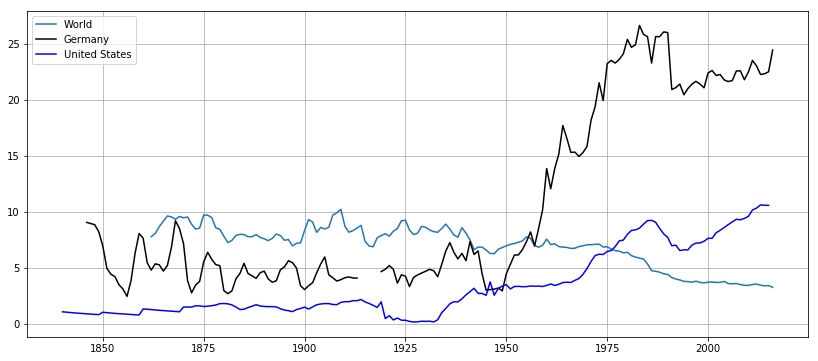

In [70]:
years38 = T38_df.Year
conspc = T38_df.World
conspcUS = T38_df['United States']
conspcIT = T38_df.Italy
conspcDE = T38_df.Germany
conspcFR = T38_df.France
conspcES = T38_df.Spain

plt.figure(figsize=(14,6))
plt.grid()
plt.plot(years38,conspc)
#plt.plot(years38,conspcFR, color='r')
#plt.plot(years38,conspcIT, color='g')
#plt.plot(years38,conspcES, color='y')
plt.plot(years38,conspcDE, color='k')
plt.plot(years38,conspcUS, color='b')
plt.legend()

In [16]:
T15_df = pd.read_excel(file, sheet_name='T15 Wine import vol', skiprows=1)
T15_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
print("Column headings:")
print(T15_df.columns)
T15_df.tail()

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation', 'Unnamed: 57', 'Norway'],
      dtype='object')


,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation,Unnamed: 57,Norway
177,2012,598962.0,267858.077,125943.000000,194400.000,83949.0,334287.0,190240.0,65395.0,1526704.0,...,27924.00,16820.0,14906.0,68125.000000,NaN,1.015212e+07,NaN,1.695076,NaN,84074.0
178,2013,532186.0,255425.467,152525.000000,60700.000,80984.0,335014.0,202792.0,64326.0,1517600.0,...,29422.00,16643.0,15493.0,73466.000000,NaN,1.003993e+07,NaN,1.689049,NaN,82582.0
179,2014,665867.0,257452.297,232398.529053,50521.000,78245.0,347510.0,196576.0,77070.0,1558597.0,...,32888.00,17024.0,14242.0,57276.317596,NaN,1.079021e+07,NaN,1.702891,NaN,NaN
180,2015,744363.0,277950.000,216000.000000,71706.000,73652.0,328490.0,193019.0,76013.0,1539717.0,...,30805.00,18547.0,13260.0,42903.887000,NaN,1.061377e+07,NaN,1.726116,NaN,NaN
181,2016,790000.0,170339.049,179000.000000,77250.877,NaN,310000.0,191850.0,NaN,1450000.0,...,29958.49,NaN,NaN,28334.193000,NaN,1.050203e+07,NaN,NaN,NaN,NaN


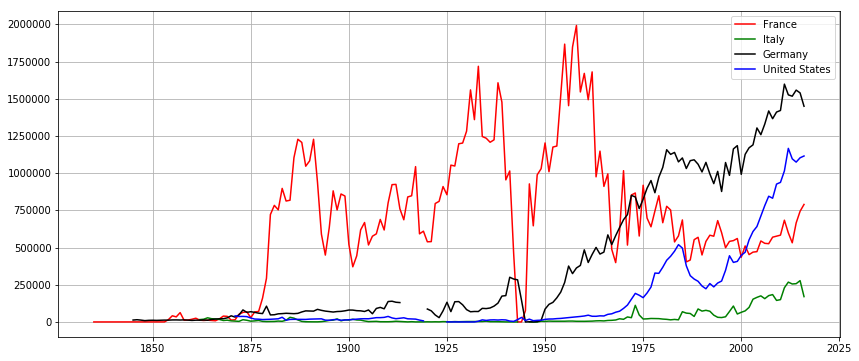

In [20]:
# Wine Imports overall

years15 = T15_df.Year
importww = T15_df.World
importUS = T15_df['United States']
importIT = T15_df.Italy
importDE = T15_df.Germany
importFR = T15_df.France

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years15,importww)
plt.plot(years15,importFR, color='r')
plt.plot(years15,importIT, color='g')
plt.plot(years15,importDE, color='k')
plt.plot(years15,importUS, color='b')
plt.legend()

In [57]:
# Wine Imports per capita
T17_df = pd.read_excel(file, sheet_name='T17 Wine imports per capita', skiprows=1)
T17_df.rename(columns={0: 'Year'}, inplace=True)
#print("Column headings:")
#print(T15_df.columns)
T17_df.tail()

,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Malaysia,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation
177,2012,9.119847,4.358321,11.977638,4.157287,9.958374,28.671541,34.022633,12.078934,18.959615,...,0.195042,0.111461,5.256381,0.722879,0.223194,0.081059,NaN,1.434014,NaN,1.380729
178,2013,8.059948,4.136445,14.582010,1.301251,9.557003,28.540151,36.124443,11.825921,18.789852,...,0.207323,0.100332,5.449326,0.712030,0.231203,0.086331,NaN,1.401984,NaN,1.417262
179,2014,9.985259,4.172106,22.340979,1.092117,9.187011,29.491683,34.811319,14.064741,19.195017,...,0.270851,0.147682,5.972485,0.726590,0.210289,0.066600,NaN,1.485072,NaN,1.381855
180,2015,11.159865,4.503621,20.869962,1.554713,8.619727,27.682849,34.047670,13.811864,18.736821,...,0.342224,0.170359,5.497221,0.789570,0.195117,0.049315,NaN,1.444154,NaN,1.368479
181,2016,NaN,2.760763,17.211538,1.679367,NaN,25.833333,33.657895,NaN,17.554479,...,0.396897,0.199259,5.255875,NaN,NaN,0.032198,NaN,1.415749,NaN,NaN


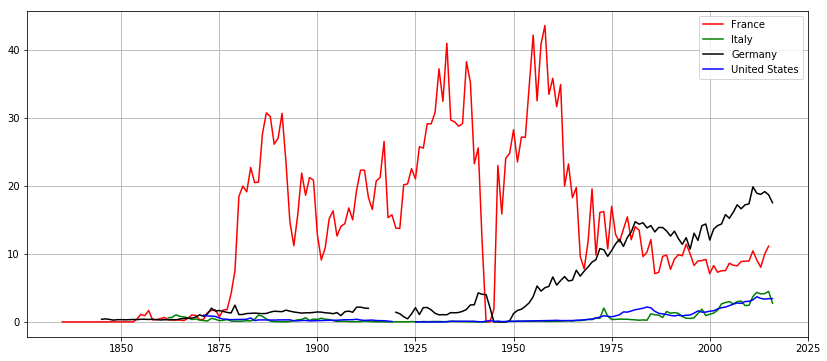

In [60]:
# Wine Imports per capita

years17 = T17_df.Year
importpcww = T17_df.World
importpcUS = T17_df['United States']
importpcIT = T17_df.Italy
importpcDE = T17_df.Germany
importpcFR = T17_df.France

plt.figure(figsize=(14,6))
plt.grid()
#plt.plot(years17,importww)
plt.plot(years17,importpcFR, color='r')
plt.plot(years17,importpcIT, color='g')
plt.plot(years17,importpcDE, color='k')
plt.plot(years17,importpcUS, color='b')
plt.legend()

In [61]:
# Exports
T10_df = pd.read_excel(file, sheet_name='T10 Wine export vol', skiprows=1)
T10_df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)
print("Column headings:")
print(T10_df.columns)
T10_df.tail()

Column headings:
Index(['Year', 'France', 'Italy', 'Portugal', 'Spain', 'Austria', 'Bel-Lux',
       'Denmark', 'Finland', 'Germany', 'Greece', 'Ireland', 'Netherlands',
       'Sweden', 'Switzerland', 'United Kingdom', 'Other WEM', 'Bulgaria',
       'Croatia', 'Georgia', 'Hungary', 'Moldova', 'Romania', 'Russia',
       'Ukraine', 'Other ECA', 'Australia', 'New Zealand', 'Canada',
       'United States', 'Argentina', 'Brazil', 'Chile', 'Mexico', 'Uruguay',
       'Other LAC', 'Algeria', 'Morocco', 'South Africa', 'Tunisia', 'Turkey',
       'Other AME', 'China', 'Hong Kong', 'India', 'Japan', 'Korea',
       'Malaysia', 'Philippines', 'Singapore', 'Taiwan', 'Thailand',
       'Other Asia Pacific', 'Other', 'World', 'Unnamed: 55',
       'Coeff. of variation', 'Subtotal= sum of available data',
       'Share of world (%)'],
      dtype='object')


,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation,Subtotal= sum of available data,Share of world (%)
177,2012,1565416.0,2275859.810,341400.0,2095279.0,50344.0,30573.000,38000.0,1394.000000,408000.0,...,15286.000000,286.106,6855.0,10880.0,NaN,1.059796e+07,NaN,2.370933,1.059796e+07,93.558265
178,2013,1515045.0,2167671.086,303200.0,1800589.0,47854.0,34269.000,44198.0,1102.000000,401000.0,...,16237.000000,128.796,8283.0,13059.0,NaN,1.031781e+07,NaN,2.279021,1.031781e+07,100.693455
179,2014,1467245.0,2162436.950,284290.0,2345512.0,49709.0,40079.000,37365.0,7654.450893,392318.0,...,17893.415451,96.833,8221.0,13510.0,NaN,1.040102e+07,NaN,2.396653,1.059273e+07,100.693455
180,2015,1454396.0,2026222.000,280320.0,2474416.0,48531.0,40006.000,33665.0,9520.000000,369054.0,...,17934.000000,53.399,9331.0,NaN,NaN,1.104233e+07,NaN,2.379915,1.060576e+07,100.693455
181,2016,1410000.0,2060000.000,277763.0,2230000.0,49000.0,36498.083,33650.0,NaN,360000.0,...,17411.251000,NaN,NaN,NaN,NaN,1.048946e+07,NaN,NaN,NaN,NaN


In [63]:
# Top exporters in 2016

T10_2016_se = T10_df.iloc[181,1:52] # First column is year. Columns 53 onwards are calculations 
T10_2016_df = pd.DataFrame({'Country':T10_2016_se.index,'Export Volume':T10_2016_se.values})
T10_2016_df = T10_2016_df.dropna(how='any') # dropping countries without data
T10_2016_df = T10_2016_df.set_index('Country')
T10_2016_df = T10_2016_df.sort_values("Export Volume", ascending=False)
T10_2016_df.head()

,Export Volume
Country,
Spain,2230000.0
Italy,2060000.0
France,1410000.0
Chile,910966.0
Australia,750000.0


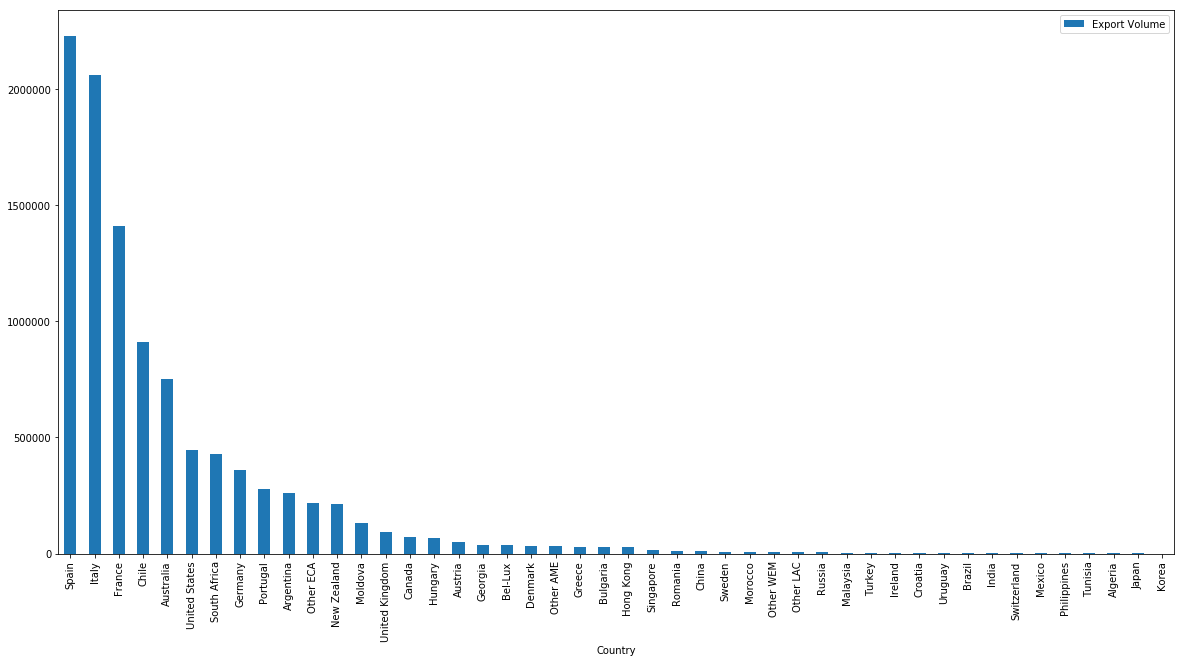

In [64]:
# plot
T10_2016_df.plot(kind="bar", figsize=(20,10))

In [8]:
# Cleaning and limiting the data to years 1950-2016
wine_prod_df=T6_df.loc[T6_df["Year"] >=1950]
wine_prod_df

,Year,France,Italy,Portugal,Spain,Austria,Bel-Lux,Denmark,Finland,Germany,...,Malaysia,Philippines,Singapore,Taiwan,Thailand,Other Asia Pacific,Other,World,Unnamed: 55,Coeff. of variation
115,1950,6510000.0,4104900.0,8.502000e+05,1.446909e+06,129100.0,5839.375,NaN,NaN,324400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.976051e+07,NaN,2.197559
116,1951,5290000.0,4976100.0,8.948000e+05,1.607429e+06,110400.0,6407.250,NaN,NaN,311240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.940452e+07,NaN,2.114118
117,1952,5390000.0,4485400.0,5.625000e+05,1.788882e+06,74600.0,6975.125,NaN,NaN,271300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.834958e+07,NaN,2.168358
118,1953,5910000.0,5254200.0,1.121182e+06,2.346546e+06,82600.0,7543.000,NaN,NaN,245600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181773e+07,NaN,2.095006
119,1954,6090000.0,5047400.0,1.163709e+06,1.749850e+06,163900.0,8110.875,NaN,NaN,309800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.149637e+07,NaN,2.093055
120,1955,6110000.0,5844100.0,1.091321e+06,1.684707e+06,116400.0,8678.750,NaN,NaN,240500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.253533e+07,NaN,2.120831
121,1956,5170000.0,6298100.0,1.037742e+06,2.114386e+06,35100.0,9246.625,NaN,NaN,92900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.189319e+07,NaN,2.134681
122,1957,3330000.0,4283800.0,9.576367e+05,1.736452e+06,141500.0,9814.500,NaN,NaN,226400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.723368e+07,NaN,1.826166
123,1958,4770000.0,6799500.0,8.585006e+05,1.983384e+06,189700.0,10382.375,NaN,NaN,480000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.243893e+07,NaN,2.086918
124,1959,6030000.0,6837900.0,8.924240e+05,1.727795e+06,72800.0,10950.250,NaN,NaN,430300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.425699e+07,NaN,2.120517
